In [1]:
import sys, os

import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

# Prepare the data

In [2]:
%%time

path = os.getcwd() + '/datasets/asirra/'

num_classes = 2

# Get images paths
imgs_path = list()
for i in os.listdir(path):        
    if 'jpg' in i:
        imgs_path.append(path + i)
        
# Shuffle images paths
np.random.shuffle(imgs_path)
            
# Get labels
labels_names = list()
for i in imgs_path:
    if 'dog' in i:
        labels_names.append(1)
    if 'cat' in i:
        labels_names.append(0)

# Convert images names into numpy array of numbers wothout fix images shape
'''
dataset        = np.array([np.array(load_img(i)) for i in imgs_path])
dataset_shapes = np.array([np.array(load_img(i)).shape for i in imgs_path]) # Used to reshape images later
'''

# Convert class vectors to binary class matrices
labels  = np.array(labels_names)
labels  = tf.keras.utils.to_categorical(labels, num_classes)

print('len imgs_path :', len(imgs_path))
print('len labels    :', len(labels), '\n')
'''
print('len dataset   :', len(dataset))
print('shape datatset:', dataset.shape)
print('images shape  :', dataset[0].shape, '\n')
'''

del labels_names

len imgs_path : 1100
len labels    : 1100 

CPU times: user 2.76 ms, sys: 4.24 ms, total: 7 ms
Wall time: 5.81 ms


## Calculate mean shape to fix all images to the same shape

In [3]:
'''
resolutions = [8, 16, 32, 64, 128, 256, 512, 1024, 2048] # Common images resolutions

mean_shape  = 2048
for i in resolutions:
    if i - dataset_shapes.mean() > 0:
        if i - dataset_shapes.mean() < mean_shape:
            mean_shape = i

del dataset_shapes
'''

'\nresolutions = [8, 16, 32, 64, 128, 256, 512, 1024, 2048] # Common images resolutions\n\nmean_shape  = 2048\nfor i in resolutions:\n    if i - dataset_shapes.mean() > 0:\n        if i - dataset_shapes.mean() < mean_shape:\n            mean_shape = i\n\ndel dataset_shapes\n'

## Split data

In [4]:
%%time

# Convert images names into numpy array of numbers fixing images shape
'''
dataset = np.array([np.array(load_img(i, target_size=(mean_shape, mean_shape))) for i in imgs_path])
'''
dataset = np.array([np.array(load_img(i, target_size=(64, 64))) for i in imgs_path])

# Data split between train and test sets
percent_split = int((len(dataset)*75) / 100) # 75% for train and test

x_train = dataset[:percent_split]
y_train = labels[:percent_split]

x_test = dataset[percent_split+1:]
y_test = labels[percent_split+1:]

# Scale images to the [0, 1] range
x_train = x_train.astype('float32') / 255
x_test  = x_test.astype('float32') / 255

input_shape = x_train[0].shape # Input image dimensions

print('\ninput shape:', input_shape)
print('\nN train elements:', x_train.shape[0])
print('N test elements   :', x_test.shape[0])
print('\none hot enconding:{}\n'.format(y_train[0, :]))

del imgs_path
del dataset
del labels


input shape: (64, 64, 3)

N train elements: 825
N test elements   : 274

one hot enconding:[1. 0.]

CPU times: user 5.39 s, sys: 135 ms, total: 5.53 s
Wall time: 5.55 s


# Build the model

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=input_shape))
# 2 convolutional layers...
model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
# ...and 1 fully connected layers
model.add(tf.keras.layers.Dense(num_classes, activation='softmax')) # One Neuron for each class
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6

# Train the model

In [6]:
%%time

batch_size = 128
epochs     = 8

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 742 samples, validate on 83 samples
Epoch 1/8
742/742 [==============================] - 11s 15ms/sample - loss: 0.7155 - accuracy: 0.4798 - val_loss: 0.6950 - val_accuracy: 0.5663
Epoch 2/8
742/742 [==============================] - 8s 11ms/sample - loss: 0.6930 - accuracy: 0.5135 - val_loss: 0.6970 - val_accuracy: 0.5301
Epoch 3/8
742/742 [==============================] - 9s 12ms/sample - loss: 0.6886 - accuracy: 0.5323 - val_loss: 0.6959 - val_accuracy: 0.5542
Epoch 4/8
742/742 [==============================] - 8s 11ms/sample - loss: 0.6793 - accuracy: 0.5526 - val_loss: 0.6950 - val_accuracy: 0.5542
Epoch 5/8
742/742 [==============================] - 9s 12ms/sample - loss: 0.6692 - accuracy: 0.5903 - val_loss: 0.6956 - val_accuracy: 0.5904
Epoch 6/8
742/742 [==============================] - 8s 11ms/sample - loss: 0.6659 - accuracy: 0.6132 - val_loss: 0.6963 - val_accuracy: 0.5542
Epoch 7/8
742/742 [==============================] - 8s 11ms/sample - loss: 0.6638 - accur

# Evaluate the trained model

test loss: 0.6704623942827657
test accuracy: 0.56569344 

CPU times: user 3.34 s, sys: 1.17 s, total: 4.51 s
Wall time: 2.11 s


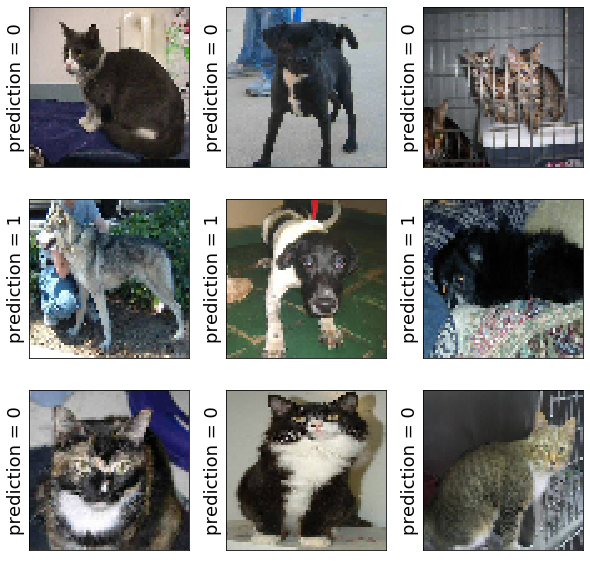

In [7]:
%%time

score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1], '\n')

results = model.predict_classes(x_test[:9])

#tmp = np.squeeze(x_test, axis=3)

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel('prediction = %d' % results[i], fontsize=18)